<a href="https://colab.research.google.com/github/theKaganOz/Computer-Vision-Notebooks/blob/main/AI_Generated_Image_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone the repository
!git clone https://github.com/jordan-bird/CIFAKE-Real-and-AI-Generated-Synthetic-Images.git

Cloning into 'CIFAKE-Real-and-AI-Generated-Synthetic-Images'...
remote: Enumerating objects: 118694, done.
remote: Counting objects: 100% (118694/118694), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 118694 (delta 118651), reused 118673 (delta 118645), pack-reused 0 (from 0)
Receiving objects: 100% (118694/118694), 39.68 MiB | 13.40 MiB/s, done.
Resolving deltas: 100% (118651/118651), done.
Updating files: 100% (120001/120001), done.


In [ ]:
import os
import random
from PIL import Image

# Function to get n random images from a directory
def get_random_images(directory, n):
    # Get a list of all image file paths in the directory
    image_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Check if there are enough images in the directory
    if len(image_files) < n:
        raise ValueError(f"Not enough images in the directory. Found {len(image_files)}, requested {n}.")

    # Select n random image file paths
    random_files = random.sample(image_files, n)

    # Load the images into a list
    images = [Image.open(file) for file in random_files]
    return images

# Directory containing the images
directory_path_fake = "/content/CIFAKE-Real-and-AI-Generated-Synthetic-Images/DATASET/train/FAKE"
directory_path_real = "/content/CIFAKE-Real-and-AI-Generated-Synthetic-Images/DATASET/train/REAL"
# Number of images to retrieve



In [ ]:
# Get the random images
n = 5000
try:
    random_images_real = get_random_images(directory_path_real, n)
    random_images_fake = get_random_images(directory_path_fake, n)
except ValueError as e:
    print(e)

In [ ]:
# prompt: get the average of the histograms of real and fake datasets respectively and hold them in a dictioanry
import numpy as np

def calculate_average_histogram(images):
    """Calculates the average histogram of a list of images."""
    total_histogram = np.zeros(256)
    for img in images:
        img_array = np.array(img)
        if len(img_array.shape) == 3:  # Check if the image is RGB
            # Calculate the histogram for each channel and sum them
            for channel in range(3):
              total_histogram += np.histogram(img_array[:, :, channel], bins=256, range=(0, 256))[0]
        elif len(img_array.shape) == 2: # Grayscale
          total_histogram += np.histogram(img_array, bins=256, range=(0,256))[0]
        else:
          print("Unsupported image format")
          return None
    return total_histogram / len(images)

# Assuming random_images_real and random_images_fake are already defined
# from the previous code.


# Calculate the average histograms
avg_histogram_real = calculate_average_histogram(random_images_real)
avg_histogram_fake = calculate_average_histogram(random_images_fake)

# Store the average histograms in a dictionary
histogram_dict = {
    "real": avg_histogram_real,
    "fake": avg_histogram_fake
}


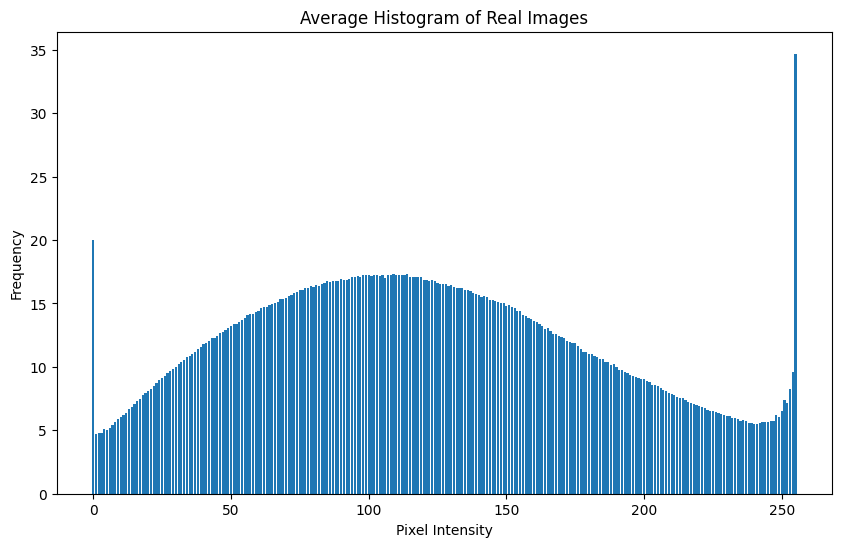

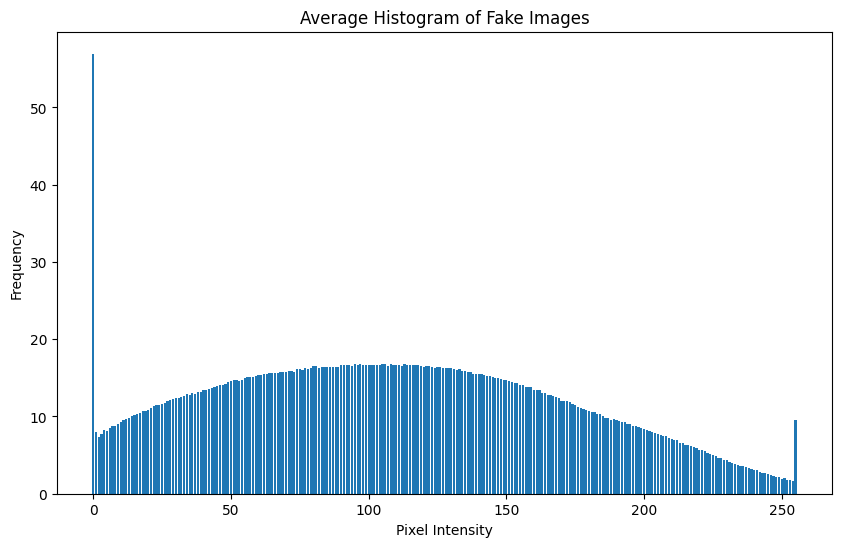

In [ ]:
# prompt: plot each histogram

import matplotlib.pyplot as plt

# Assuming histogram_dict is defined from the previous code.

for label, histogram in histogram_dict.items():
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(range(256), histogram)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title(f"Average Histogram of {label.capitalize()} Images")
    plt.show()

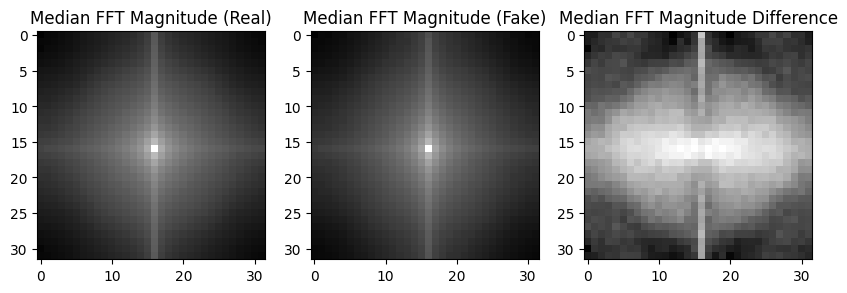

In [ ]:
# prompt: now get the median fourier transform magnitude of real and fake images, and plot them

import numpy as np

def get_2d_fft_magnitude(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    return magnitude_spectrum

def get_median_fft_magnitude(images):
  magnitudes = []
  for img in images:
    img_gray = img.convert('L') # Convert to grayscale
    img_array = np.array(img_gray)
    f = np.fft.fft2(img_array)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    magnitudes.append(magnitude_spectrum)

  median_magnitude = np.median(magnitudes, axis=0)
  return median_magnitude

# Calculate the median FFT magnitude for real and fake images
median_magnitude_real = get_median_fft_magnitude(random_images_real)
median_magnitude_fake = get_median_fft_magnitude(random_images_fake)

# Plot the median FFT magnitudes
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.log(1 + median_magnitude_real), cmap='gray')
plt.title('Median FFT Magnitude (Real)')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + median_magnitude_fake), cmap='gray')
plt.title('Median FFT Magnitude (Fake)')

plt.subplot(1, 3, 3)
plt.imshow(np.log(1 + median_magnitude_real) - np.log(1 + median_magnitude_fake), cmap='gray')
plt.title('Median FFT Magnitude Difference')

plt.show()

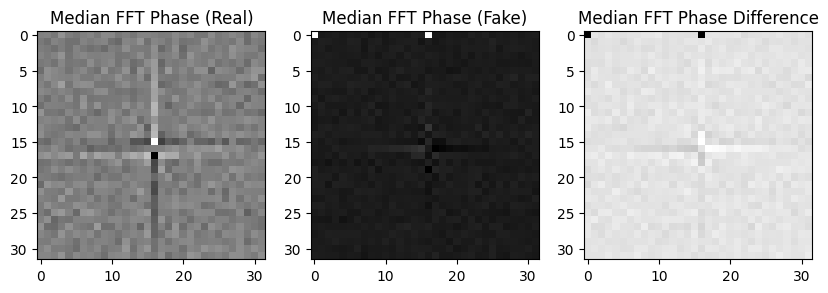

In [ ]:
# prompt: now do the above but to phase, not the magnitude

def get_2d_fft_phase(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    phase_spectrum = np.angle(fshift)
    return phase_spectrum

def get_median_fft_phase(images):
  phases = []
  for img in images:
    img_gray = img.convert('L') # Convert to grayscale
    img_array = np.array(img_gray)
    f = np.fft.fft2(img_array)
    fshift = np.fft.fftshift(f)
    phase_spectrum = np.angle(fshift)
    phases.append(phase_spectrum)

  median_phase = np.median(phases, axis=0)
  return median_phase

# Calculate the median FFT phase for real and fake images
median_phase_real = get_median_fft_phase(random_images_real)
median_phase_fake = get_median_fft_phase(random_images_fake)

# Plot the median FFT phases
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(median_phase_real, cmap='gray')
plt.title('Median FFT Phase (Real)')

plt.subplot(1, 3, 2)
plt.imshow(median_phase_fake, cmap='gray')
plt.title('Median FFT Phase (Fake)')

plt.subplot(1, 3, 3)
plt.imshow(median_phase_real - median_phase_fake, cmap='gray')
plt.title('Median FFT Phase Difference')

plt.show()

In [ ]:
# prompt: get the cosine distance between the randomly sampled image's 2d fft magnitude spectrum and that of median spectra

from scipy.spatial.distance import cosine

# Assuming median_magnitude_real, magnitude_spectrum_random are defined from previous code

# Flatten the arrays before calculating cosine distance
flat_median_magnitude_real = median_magnitude_real.flatten()
flat_median_magnitude_fake = median_magnitude_fake.flatten()

repetitions = 2000
avg_cosine_distance_fake = 0
avg_cosine_distance_real = 0
for i in range(repetitions):
  random_fake_image = random.choice(random_images_fake)
  magnitude_spectrum_random = get_2d_fft_magnitude(np.array(random_fake_image.convert("L")))
  flat_magnitude_spectrum = magnitude_spectrum_random.flatten()

  cosine_distance_fake = cosine(flat_median_magnitude_real, flat_magnitude_spectrum)
  cosine_distance_real = cosine(flat_median_magnitude_fake, flat_magnitude_spectrum)
  avg_cosine_distance_fake += cosine_distance_fake
  avg_cosine_distance_real += cosine_distance_real

avg_cosine_distance_fake /= repetitions
avg_cosine_distance_real /= repetitions

print("Cosine Distance (Fake):", avg_cosine_distance_fake)
print("Cosine Distance (Real):", avg_cosine_distance_real)

Cosine Distance (Fake): 0.03290045656634942
Cosine Distance (Real): 0.030895059060962553


In [ ]:
# prompt: do the cosine distance computations in the previous cell but using phase spectra

# Assuming median_phase_real, phase_spectrum_random are defined from previous code

# Flatten the arrays before calculating cosine distance
flat_median_phase_real = median_phase_real.flatten()
flat_median_phase_fake = median_phase_fake.flatten()

repetitions = 3000
avg_cosine_distance_fake = 0
avg_cosine_distance_real = 0
for i in range(repetitions):
  random_fake_image = random.choice(random_images_fake)
  phase_spectrum_random = get_2d_fft_phase(np.array(random_fake_image.convert("L")))
  flat_phase_spectrum = phase_spectrum_random.flatten()

  cosine_distance_fake = cosine(flat_median_phase_real, flat_phase_spectrum)
  cosine_distance_real = cosine(flat_median_phase_fake, flat_phase_spectrum)
  avg_cosine_distance_fake += cosine_distance_fake
  avg_cosine_distance_real += cosine_distance_real

avg_cosine_distance_fake /= repetitions
avg_cosine_distance_real /= repetitions

print("Cosine Distance (Phase - Fake):", avg_cosine_distance_fake)
print("Cosine Distance (Phase - Real):", avg_cosine_distance_real)

Cosine Distance (Phase - Fake): 1.000026972532594
Cosine Distance (Phase - Real): 0.960913022718781


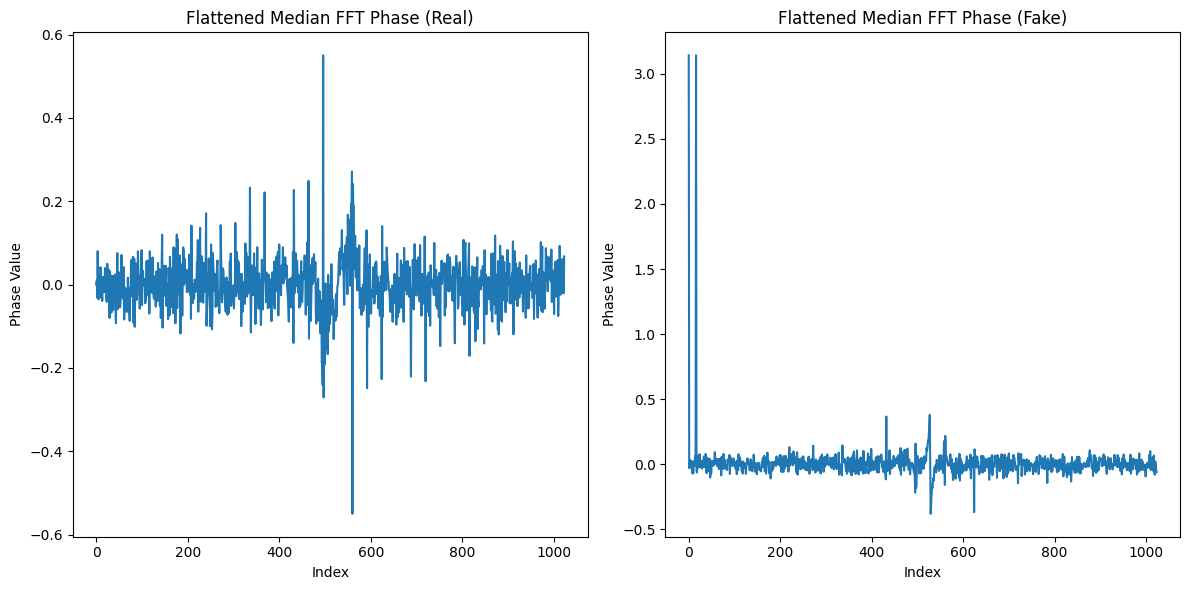

In [ ]:
# prompt: generate a plot of flattened phase spectra of real and fake images using subplot

import matplotlib.pyplot as plt

# Assuming flat_median_phase_real and flat_median_phase_fake are defined

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(flat_median_phase_real)
plt.title('Flattened Median FFT Phase (Real)')
plt.xlabel('Index')
plt.ylabel('Phase Value')


plt.subplot(1, 2, 2)
plt.plot(flat_median_phase_fake)
plt.title('Flattened Median FFT Phase (Fake)')
plt.xlabel('Index')
plt.ylabel('Phase Value')

plt.tight_layout()
plt.show()

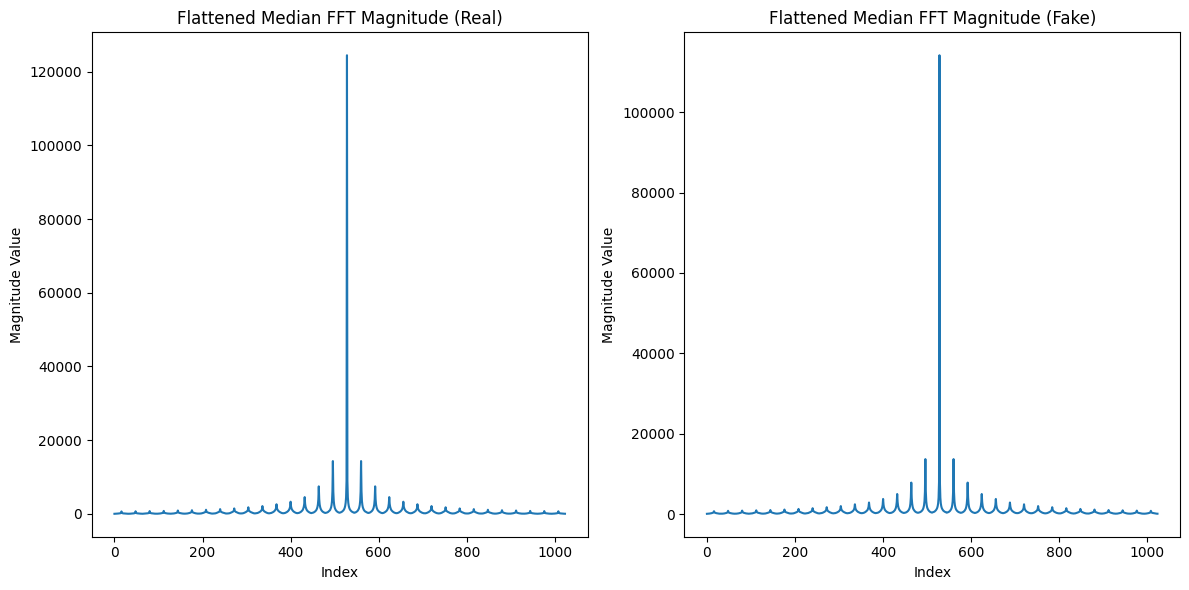

In [ ]:
# prompt: generate a plot of flattened magnitude spectra of real and fake images using subplot

import matplotlib.pyplot as plt

# Assuming flat_median_magnitude_real and flat_median_magnitude_fake are defined from previous code

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(flat_median_magnitude_real)
plt.title('Flattened Median FFT Magnitude (Real)')
plt.xlabel('Index')
plt.ylabel('Magnitude Value')


plt.subplot(1, 2, 2)
plt.plot(flat_median_magnitude_fake)
plt.title('Flattened Median FFT Magnitude (Fake)')
plt.xlabel('Index')
plt.ylabel('Magnitude Value')

plt.tight_layout()
plt.show()

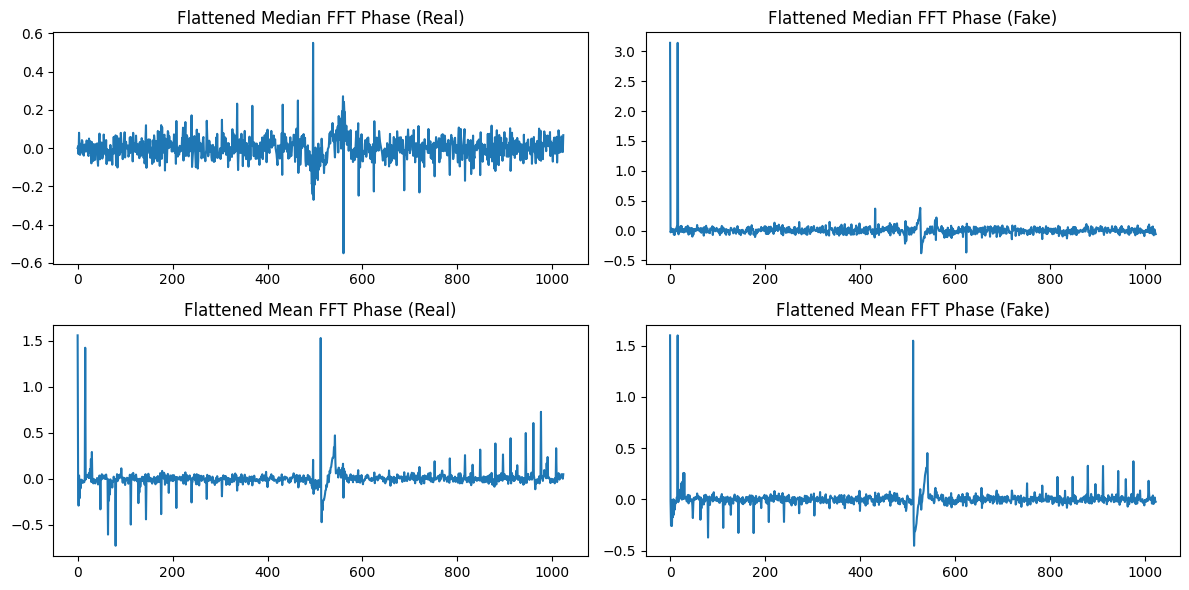

In [ ]:
# prompt: for each image in the fake and real images sets, get the fourier phase spectra, flatten it, and get the median and mean flattened spectra. plot these spectra next to each other.

import matplotlib.pyplot as plt

def get_2d_fft_phase(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    phase_spectrum = np.angle(fshift)
    return phase_spectrum

def get_stats_fft_phase(images):
    phases = []
    for img in images:
        img_gray = img.convert('L')
        img_array = np.array(img_gray)
        phase_spectrum = get_2d_fft_phase(img_array)
        phases.append(phase_spectrum.flatten())

    median_phase = np.median(phases, axis = 0)
    mean_phase = np.mean(phases, axis = 0)
    return median_phase, mean_phase


# Calculate the median and mean flattened FFT phase for real and fake images
median_phase_real, mean_phase_real = get_stats_fft_phase(random_images_real)
median_phase_fake, mean_phase_fake = get_stats_fft_phase(random_images_fake)


plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(median_phase_real)
plt.title('Flattened Median FFT Phase (Real)')

plt.subplot(2, 2, 2)
plt.plot(median_phase_fake)
plt.title('Flattened Median FFT Phase (Fake)')

plt.subplot(2, 2, 3)
plt.plot(mean_phase_real)
plt.title('Flattened Mean FFT Phase (Real)')

plt.subplot(2, 2, 4)
plt.plot(mean_phase_fake)
plt.title('Flattened Mean FFT Phase (Fake)')

plt.tight_layout()
plt.show()

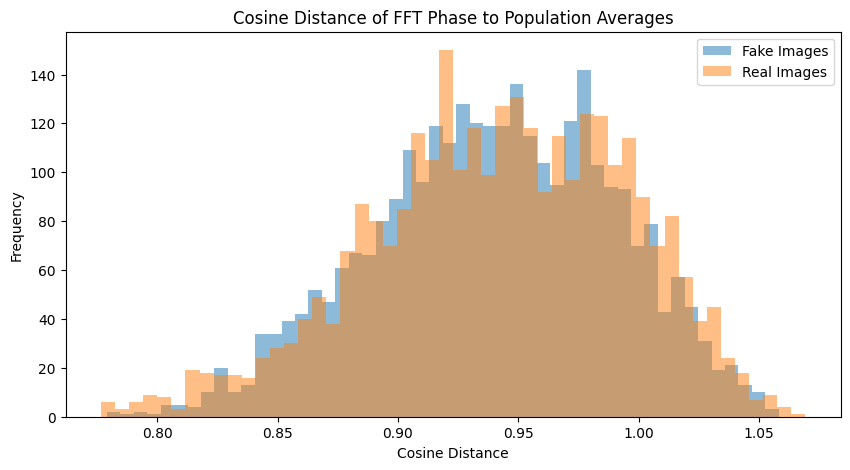

In [ ]:
# prompt: encode flattened mean fft phase for real and fake images as population_real_phase and population_fake_phase respectively. randomly select an image from both fake and real image sets, and compare its flattened fourier phase spectra to these "population" phases using a distance metric. do this for a specified number of iterations.

population_real_phase = mean_phase_real
population_fake_phase = mean_phase_fake

repetitions = 3000
fakes_to_fakes = []
fakes_to_reals = []
reals_to_reals = []
reals_to_fakes = []

for i in range(repetitions):
    random_fake_image = random.choice(random_images_fake)
    random_real_image = random.choice(random_images_real)

    phase_spectrum_random_fake = get_2d_fft_phase(np.array(random_fake_image.convert("L"))).flatten()
    phase_spectrum_random_real = get_2d_fft_phase(np.array(random_real_image.convert("L"))).flatten()

    real_to_real_comparison = cosine(population_real_phase, phase_spectrum_random_real)
    fake_to_fake_comparison = cosine(population_fake_phase, phase_spectrum_random_fake)
    real_to_fake_comparison = cosine(population_real_phase, phase_spectrum_random_fake)
    fake_to_real_comparison = cosine(population_fake_phase, phase_spectrum_random_real)

    fakes_to_fakes.append(fake_to_fake_comparison)
    fakes_to_reals.append(fake_to_real_comparison)
    reals_to_reals.append(real_to_real_comparison)
    reals_to_fakes.append(real_to_fake_comparison)

# Analyze the distances (e.g., plot histograms)
plt.figure(figsize=(10, 5))
plt.hist(fakes_to_fakes, bins=50, alpha=0.5, label='Fake Images')
plt.hist(fakes_to_reals, bins=50, alpha=0.5, label='Real Images')
plt.xlabel('Cosine Distance')
plt.ylabel('Frequency')
plt.title('Cosine Distance of FFT Phase to Population Averages')
plt.legend()
plt.show()

In [ ]:
print("Comparison of POPULATION TO SAMPLE")
print("Fakes to fakes: ", sum(fakes_to_fakes)/len(fakes_to_fakes))
print("Fakes to reals: ", sum(fakes_to_reals)/len(fakes_to_reals))
print("Reals to reals: ", sum(reals_to_reals)/len(reals_to_reals))
print("Reals to fakes: ", sum(reals_to_fakes)/len(reals_to_fakes))

Comparison of POPULATION TO SAMPLE
Fakes to fakes:  0.9397149053662006
Fakes to reals:  0.9418256830630906
Reals to reals:  0.9349032380651046
Reals to fakes:  0.9465207782826829


In [ ]:
population_real_phase_range = np.max(population_real_phase) - np.min(population_real_phase)
population_fake_phase_range = np.max(population_fake_phase) - np.min(population_fake_phase)
print("Real phase range: ", population_real_phase_range)
print("Fake phase range: ", population_fake_phase_range)

Real phase range:  2.282859069286768
Fake phase range:  2.050581154961514


In [ ]:
population_real_phase_range = np.max(np.log(1 + population_real_phase)) - np.min(np.log(1 + population_real_phase))
population_fake_phase_range = np.max(np.log(1 + population_fake_phase)) - np.min(np.log(1 + population_fake_phase))
print("Real phase range: ", population_real_phase_range)
print("Fake phase range: ", population_fake_phase_range)

Real phase range:  2.2350836020879115
Fake phase range:  1.5557410750768903


In [ ]:
# prompt: compare the zero crossing rate of population real and fake phase ranges

import numpy as np

def zero_crossing_rate(signal):
    # Calculate the zero-crossing rate of a 1D signal
    return np.sum(np.abs(np.diff(np.sign(signal)))) / (len(signal) - 1)

# Assuming population_real_phase and population_fake_phase are defined from the previous code

# Calculate the zero-crossing rates
zcr_real = zero_crossing_rate(population_real_phase)
zcr_fake = zero_crossing_rate(population_fake_phase)

print(f"Zero-crossing rate of population real phase: {zcr_real}")
print(f"Zero-crossing rate of population fake phase: {zcr_fake}")

Zero-crossing rate of population real phase: 0.8758553274682307
Zero-crossing rate of population fake phase: 0.9364613880742912


In [ ]:
# prompt: compare the entropy of population phases

import numpy as np

def entropy(signal):
    # Calculate the histogram of the signal
    hist, _ = np.histogram(signal, bins=256)

    # Normalize the histogram to get probabilities
    probabilities = hist / np.sum(hist)

    # Remove zero probabilities to avoid errors in the log calculation
    probabilities = probabilities[probabilities > 0]

    # Calculate the entropy
    return -np.sum(probabilities * np.log2(probabilities))

# Assuming population_real_phase and population_fake_phase are defined from the previous code

# Calculate the entropy of the populations
entropy_real = entropy(population_real_phase)
entropy_fake = entropy(population_fake_phase)

print(f"Entropy of real population phase: {entropy_real}")
print(f"Entropy of fake population phase: {entropy_fake}")

Entropy of real population phase: 4.4084156843170454
Entropy of fake population phase: 4.280999809651833


In [ ]:
# prompt: get the training set from real and ai generated image dataset. for each image, compute the fourier phase spectrum and flatten it. in a pandas dataframe, add lowest "n" phase values of each data point as features, alongside whether it is real or ai.

import pandas as pd
import numpy as np

# Assuming random_images_real and random_images_fake are defined from previous code
# and get_2d_fft_phase function is available.

def create_dataframe(images, label):
    data = []
    for img in images:
      try:
        img_gray = img.convert('L')
        img_array = np.array(img_gray)
        phase_spectrum = get_2d_fft_phase(img_array).flatten()
        n = 8  # Number of lowest phase values to use as features
        lowest_phase_values = np.sort(phase_spectrum)[:n]
        data.append(list(lowest_phase_values) + [label])
      except Exception as e:
        print("Error processing image:", e)
    return data

n_lowest_phase_values = 8

# Create dataframes
real_data = create_dataframe(random_images_real, 'real')
fake_data = create_dataframe(random_images_fake, 'fake')


#Combine the list of lists
all_data = real_data + fake_data

# Create column names
column_names = [f"phase_{i}" for i in range(n_lowest_phase_values)] + ['label']

# Create the DataFrame
df = pd.DataFrame(all_data, columns = column_names)

df

,phase_0,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7,label
0,-3.140343,-3.136809,-3.136300,-3.134964,-3.130536,-3.125531,-3.116619,-3.108254,real
1,-3.131786,-3.124881,-3.123389,-3.116530,-3.106560,-3.100928,-3.067977,-3.064331,real
2,-3.136371,-3.135981,-3.126677,-3.126049,-3.116539,-3.113097,-3.105993,-3.103906,real
3,-3.134446,-3.129809,-3.123678,-3.118363,-3.116842,-3.110024,-3.109547,-3.109070,real
4,-3.141139,-3.119677,-3.077653,-3.075754,-3.060165,-3.054791,-3.048280,-3.044250,real
...,...,...,...,...,...,...,...,...,...
9995,-3.132304,-3.132273,-3.117801,-3.106572,-3.105485,-3.097418,-3.091530,-3.088557,fake
9996,-3.138641,-3.130246,-3.129755,-3.107387,-3.099320,-3.092105,-3.078194,-3.065371,fake
9997,-3.134425,-3.130421,-3.112107,-3.098907,-3.095612,-3.087337,-3.076177,-3.073797,fake
9998,-3.140573,-3.139068,-3.134360,-3.124897,-3.112276,-3.110538,-3.102773,-3.096192,fake


In [ ]:
# prompt: scale the df using min-max scaling

from sklearn.preprocessing import MinMaxScaler

# Assuming df is defined from the previous code

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the numerical features (excluding the 'label' column)
numerical_cols = df.columns[:-1]  # Select all columns except 'label'
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df

,phase_0,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7,label
0,0.016688,0.052773,0.040253,0.030328,0.047371,0.056219,0.081760,0.102016,real
1,0.130995,0.190810,0.151295,0.135692,0.175866,0.165843,0.282005,0.285450,real
2,0.069749,0.062350,0.123021,0.081284,0.122385,0.111621,0.125507,0.120174,real
3,0.095467,0.133779,0.148807,0.125219,0.120759,0.125312,0.110874,0.098605,real
4,0.006048,0.251036,0.544672,0.368758,0.424515,0.371411,0.363092,0.369314,real
...,...,...,...,...,...,...,...,...,...
9995,0.124080,0.105260,0.199358,0.192610,0.181630,0.181480,0.185044,0.184277,fake
9996,0.039418,0.128722,0.096539,0.187955,0.214670,0.205156,0.239946,0.281107,fake
9997,0.095742,0.126693,0.248329,0.236424,0.234542,0.226399,0.248247,0.245916,fake
9998,0.013616,0.026625,0.056936,0.087870,0.145233,0.123025,0.138760,0.152388,fake


In [ ]:
# prompt: get the variance-covariance matrix of real and fake instances

import pandas as pd
import numpy as np

# Assuming df is defined from the previous code and contains 'real' and 'fake' data
# with numerical features scaled using MinMaxScaler

# Separate real and fake instances
real_instances = df[df["label"] == "real"]
fake_instances = df[df["label"] == "fake"]

# Extract the numerical features (excluding the 'label' column)
real_features = real_instances.drop("label", axis=1)
fake_features = fake_instances.drop("label", axis=1)



In [ ]:
real_features.corr()

,phase_0,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7
phase_0,1.000000,0.714110,0.578703,0.504249,0.447651,0.404192,0.376857,0.347617
phase_1,0.714110,1.000000,0.821071,0.714968,0.632004,0.572962,0.536361,0.499906
phase_2,0.578703,0.821071,1.000000,0.872522,0.776801,0.713150,0.667097,0.623833
phase_3,0.504249,0.714968,0.872522,1.000000,0.894925,0.823862,0.767163,0.722020
phase_4,0.447651,0.632004,0.776801,0.894925,1.000000,0.920288,0.860376,0.809728
phase_5,0.404192,0.572962,0.713150,0.823862,0.920288,1.000000,0.934234,0.881905
phase_6,0.376857,0.536361,0.667097,0.767163,0.860376,0.934234,1.000000,0.943529
phase_7,0.347617,0.499906,0.623833,0.722020,0.809728,0.881905,0.943529,1.000000


In [ ]:
fake_features.corr()

,phase_0,phase_1,phase_2,phase_3,phase_4,phase_5,phase_6,phase_7
phase_0,1.000000,0.727922,0.603162,0.528736,0.473857,0.442824,0.407461,0.376405
phase_1,0.727922,1.000000,0.829255,0.724993,0.646181,0.594103,0.543110,0.510551
phase_2,0.603162,0.829255,1.000000,0.873212,0.789182,0.724641,0.668250,0.625772
phase_3,0.528736,0.724993,0.873212,1.000000,0.904439,0.829147,0.767138,0.720170
phase_4,0.473857,0.646181,0.789182,0.904439,1.000000,0.914373,0.848725,0.800675
phase_5,0.442824,0.594103,0.724641,0.829147,0.914373,1.000000,0.927073,0.872592
phase_6,0.407461,0.543110,0.668250,0.767138,0.848725,0.927073,1.000000,0.941771
phase_7,0.376405,0.510551,0.625772,0.720170,0.800675,0.872592,0.941771,1.000000


from matplotlib import pyplot as plt
_df_0['phase_0'].plot(kind='hist', bins=20, title='phase_0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['phase_1'].plot(kind='hist', bins=20, title='phase_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['phase_2'].plot(kind='hist', bins=20, title='phase_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['phase_3'].plot(kind='hist', bins=20, title='phase_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='phase_0', y='phase_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='phase_1', y='phase_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='phase_2', y='phase_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='phase_3', y='phase_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['phase_7']
  ys = series['phase_0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('phase_7', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('phase_7')
_ = plt.ylabel('phase_0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['phase_7']
  ys = series['phase_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('phase_7', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('phase_7')
_ = plt.ylabel('phase_1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['phase_7']
  ys = series['phase_2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('phase_7', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('phase_7')
_ = plt.ylabel('phase_2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['phase_7']
  ys = series['phase_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('phase_7', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('phase_7')
_ = plt.ylabel('phase_3')

from matplotlib import pyplot as plt
_df_12['phase_0'].plot(kind='line', figsize=(8, 4), title='phase_0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['phase_1'].plot(kind='line', figsize=(8, 4), title='phase_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['phase_2'].plot(kind='line', figsize=(8, 4), title='phase_2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['phase_3'].plot(kind='line', figsize=(8, 4), title='phase_3')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# prompt: apply logistic regression to classify real or fake.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming df is defined from the previous code and is scaled

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.50      0.49      0.49       988
        real       0.51      0.53      0.52      1012

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



<ipython-input-47-998e87d2c5bc>:13: RuntimeWarning: overflow encountered in scalar subtract
  cross_diff[i, j] = abs(image[i+1, j] - image[i-1, j]) + abs(image[i, j+1] - image[i, j-1])
<ipython-input-47-998e87d2c5bc>:13: RuntimeWarning: overflow encountered in scalar add
  cross_diff[i, j] = abs(image[i+1, j] - image[i-1, j]) + abs(image[i, j+1] - image[i, j-1])


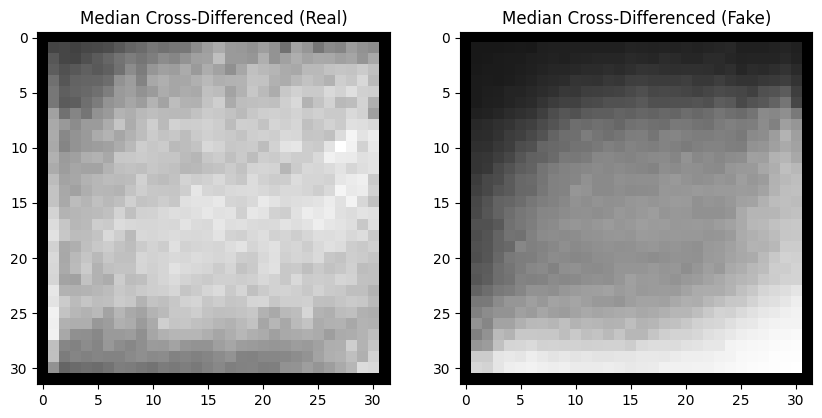

In [ ]:
# prompt: apply a cross differencing operator to both real and fake images and obtain a median cross-differenced image for each type of images. compare the plots of the median of cross-differenced real and fake images.

import numpy as np
import matplotlib.pyplot as plt

def cross_difference(image):
  """Applies a cross-difference operator to an image."""
  # Assuming image is a 2D numpy array representing the image
  rows, cols = image.shape
  cross_diff = np.zeros_like(image, dtype=float)
  for i in range(1, rows - 1):
      for j in range(1, cols - 1):
          cross_diff[i, j] = abs(image[i+1, j] - image[i-1, j]) + abs(image[i, j+1] - image[i, j-1])
  return cross_diff

def median_cross_difference(images):
  """Calculates the median cross-differenced image from a list of images."""
  cross_diffs = []
  for img in images:
    img_gray = img.convert('L') # Convert to grayscale
    img_array = np.array(img_gray)
    cross_diffs.append(cross_difference(img_array))
  median_cd = np.median(cross_diffs, axis=0)
  return median_cd

# Assuming random_images_real and random_images_fake are defined from previous code.

# Calculate the median cross-differenced images
median_cd_real = median_cross_difference(random_images_real)
median_cd_fake = median_cross_difference(random_images_fake)

# Plot the median cross-differenced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(median_cd_real, cmap='gray')
plt.title('Median Cross-Differenced (Real)')

plt.subplot(1, 2, 2)
plt.imshow(median_cd_fake, cmap='gray')
plt.title('Median Cross-Differenced (Fake)')

plt.show()

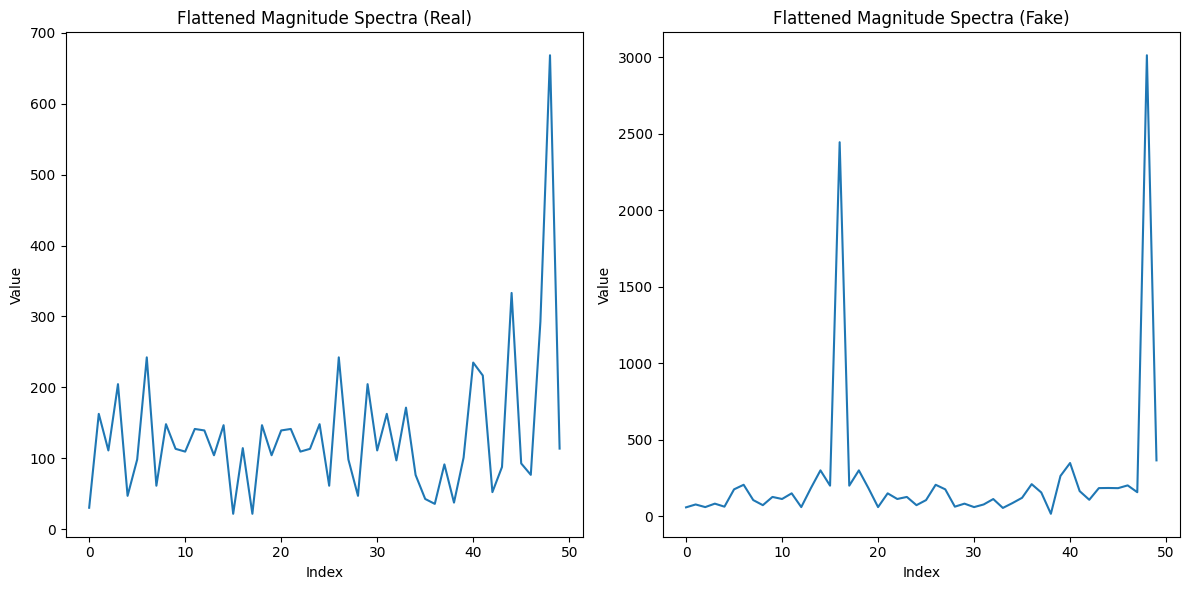

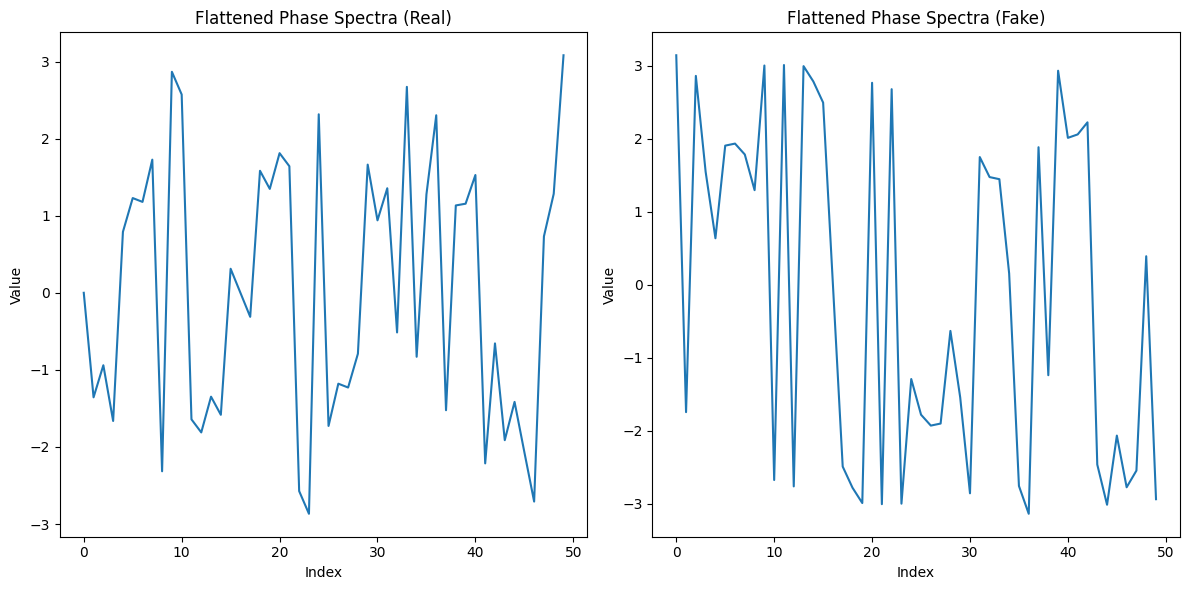

In [ ]:
# prompt: get 2d fft spectra of median cross differences for real and fake images, do this for both magnitude and phase spectra, flatten each, compare their plots side by side

import matplotlib.pyplot as plt

def get_2d_fft_spectra(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)
    phase_spectrum = np.angle(fshift)
    return magnitude_spectrum, phase_spectrum

def plot_flattened_spectra(real_spectra, fake_spectra, title, indices):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(real_spectra.flatten()[indices[0]:indices[1]])
    plt.title(f'Flattened {title} (Real)')
    plt.xlabel('Index')
    plt.ylabel('Value')

    plt.subplot(1, 2, 2)
    plt.plot(fake_spectra.flatten()[indices[0]:indices[1]])
    plt.title(f'Flattened {title} (Fake)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.tight_layout()
    plt.show()


# Calculate the median cross-difference for real and fake images (assuming median_cd_real and median_cd_fake are already calculated)

# Get 2D FFT spectra for the median cross-differences
magnitude_real, phase_real = get_2d_fft_spectra(median_cd_real)
magnitude_fake, phase_fake = get_2d_fft_spectra(median_cd_fake)

indices = [0, 50]
# Plot and compare the flattened magnitude spectra
plot_flattened_spectra(magnitude_real, magnitude_fake, "Magnitude Spectra", indices)

# Plot and compare the flattened phase spectra
plot_flattened_spectra(phase_real, phase_fake, "Phase Spectra", indices)